<font size="+3"><strong>1. Test Driven Development</strong></font>

In [48]:
%reload_ext autoreload

%autoreload 2
import sqlite3
import sqlite3 as sql
import matplotlib.pyplot as plt
import pandas as pd
from config import settings

# Building Our Data Module

In [49]:
# Import `AlphaVantageAPI`
from data import AlphaVantageAPI

# Create instance of `AlphaVantageAPI` class
av = AlphaVantageAPI()

print("av type:", type(av))

av type: <class 'data.AlphaVantageAPI'>


In [50]:
# Define SASOL 'SUZLON.BSE' ticker symbol
ticker = "SUZLON.BSE"

# Use your `av` object to get daily data
df_suzlon = av.get_daily(ticker=ticker)

print("df_suzlon type:", type(df_suzlon))
print("df_suzlon", df_suzlon.shape)
df_suzlon.head()

df_suzlon type: <class 'pandas.core.frame.DataFrame'>
df_suzlon (4719, 5)


,open,high,low,close,volume
date,,,,,
2024-12-11,66.49,67.18,65.91,66.08,1995546.0
2024-12-10,67.30,67.36,65.90,66.53,1630743.0
2024-12-09,67.40,67.80,66.42,67.31,2499631.0
2024-12-06,68.25,68.37,67.20,67.37,2925398.0
2024-12-05,68.20,68.79,66.85,68.22,8175293.0


In [51]:
# Does `get_daily` return a DataFrame?

assert isinstance(df_suzlon, pd.DataFrame)

# Does DataFrame have 5 columns?

assert df_suzlon.shape[1]==5

# Does DataFrame have a DatetimeIndex?

assert isinstance(df_suzlon.index, pd.DatetimeIndex)

# Is the index name "date"?
assert df_suzlon.index.name=="date"

In [52]:
# Does DataFrame have correct column names?
assert df_suzlon.columns.to_list()==['open', 'high', 'low', 'close', 'volume']

# Are columns correct data type?
assert all(df_suzlon.dtypes==float)

## SQL Repository Class

Connect to the database 

In [53]:
connection = sqlite3.connect(database=settings.db_name, check_same_thread=False)

print("connection type:", type(connection))

connection type: <class 'sqlite3.Connection'>


Write two tests for the SQLRepository class, using the comments below as a guide

In [54]:
# Import class definition

from data import SQLRepository

# Create instance of class
repo = SQLRepository(connection=connection)

# Does `repo` have a "connection" attribute?
assert hasattr(repo, "connection")

# Is the "connection" attribute a SQLite `Connection`?
assert isinstance(repo.connection, sqlite3.Connection)

The next method we need for the SQLRepository class is one that allows us to store information. In SQL talk, this is generally referred to as inserting tables into the database.

Add an insert_table method to your SQLRepository class. As a guide use the assert statements below and the docstring in the data module. When you're done, run the cell below to check your work

In [55]:
response = repo.insert_table(table_name=ticker, records=df_suzlon, if_exists="replace")

# Does your method return a dictionary?
assert isinstance(response, dict)

# Are the keys of that dictionary correct?
assert sorted(list(response.keys())) == ["records_inserted", "transaction_successful"]

In [56]:
%reload_ext sql
%sql sqlite:////Users/nhlam/Desktop/data-science-project/AMBUJACEP-PROJECT/stocks.sqlite5

In [57]:
conn= sqlite3.connect("C:/Users/nhlam/Desktop/data-science-project/AMBUJACEP-PROJECT/stocks.sqlite5")

In [58]:
#%config SqlMagic.style = '_DEPRECATED_DEFAULT'

In [ ]:
%%sql
SELECT *
FROM 'SUZLON.BSE'
LIMIT 5


First, write a SQL query to get all the massmart data. Then use pandas to extract the data from the database and read it into a DataFrame, names df_massmart_test.

In [60]:
sql = "SELECT *FROM 'AGRPY'"
df_suzlon_test = pd.read_sql(
    sql= sql, con= connection
)

print("df_suzlon_test type:", type(df_suzlon_test))
print()
print(df_suzlon_test.info())
df_suzlon_test.head()

df_suzlon_test type: <class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4365 entries, 0 to 4364
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    4365 non-null   object 
 1   open    4365 non-null   float64
 2   high    4365 non-null   float64
 3   low     4365 non-null   float64
 4   close   4365 non-null   float64
 5   volume  4365 non-null   float64
dtypes: float64(5), object(1)
memory usage: 204.7+ KB
None


,date,open,high,low,close,volume
0,2024-11-20 00:00:00,18.435,18.435,18.435,18.435,40.0
1,2024-11-19 00:00:00,18.435,18.435,18.435,18.435,104.0
2,2024-11-18 00:00:00,18.435,18.435,18.435,18.435,474.0
3,2024-11-15 00:00:00,18.280,18.349,18.211,18.349,959.0
4,2024-11-14 00:00:00,18.370,18.370,18.370,18.370,444.0


 Complete the assert statements below to test your read_table function. Use the comments as a guide.

In [61]:
# Assign `read_table` output to `df_suzlon`
df_suzlon = repo.read_table(table_name="SUZLON.BSE", limit=2500)  # noQA F821

# Is `df_capitect` a DataFrame?
assert isinstance(df_suzlon, pd.DataFrame)

# Does it have a `DatetimeIndex`?
assert isinstance(df_suzlon.index, pd.DatetimeIndex)

# Is the index named "date"?
assert df_suzlon.index.name=="date"

# Does it have 2,500 rows and 5 columns?
assert df_suzlon.shape== (2500, 5)

# Are the column names correct?
assert df_suzlon.columns.to_list()==['open', 'high', 'low', 'close', 'volume']

# Are the column data types correct?
assert all(df_suzlon == float)

# Print `dt_massmart` info
print("df_sasol shape:", df_suzlon.shape)
print()
print(df_suzlon.info())
df_suzlon.head()

df_sasol shape: (2500, 5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2500 entries, 2024-12-11 to 2014-10-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2500 non-null   float64
 1   high    2500 non-null   float64
 2   low     2500 non-null   float64
 3   close   2500 non-null   float64
 4   volume  2500 non-null   float64
dtypes: float64(5)
memory usage: 117.2 KB
None


,open,high,low,close,volume
date,,,,,
2024-12-11,66.49,67.18,65.91,66.08,1995546.0
2024-12-10,67.30,67.36,65.90,66.53,1630743.0
2024-12-09,67.40,67.80,66.42,67.31,2499631.0
2024-12-06,68.25,68.37,67.20,67.37,2925398.0
2024-12-05,68.20,68.79,66.85,68.22,8175293.0


Expand on the code you're written above to complete the read_table function below. Use the docstring as a guide.

In [62]:
def read_table(table_name, limit=None):

    """Read table from database.

    Parameters
    ----------
    table_name : str
        Name of table in SQLite database.
    limit : int, None, optional
        Number of most recent records to retrieve. If `None`, all
        records are retrieved. By default, `None`.

    Returns
    -------
    pd.DataFrame
        Index is DatetimeIndex "date". Columns are 'open', 'high',
        'low', 'close', and 'volume'. All columns are numeric.
    """
    # Create SQL query (with optional limit)
    if limit:
         sql = f"SELECT * FROM '{table_name}' LIMIT {limit}"
    else:
        sql = f"SELECT * FROM '{table_name}'"


    # Retrieve data, read into DataFrame
    df= pd.read_sql(
            sql= sql, con= connection, parse_dates= ["date"], index_col= "date"
        )


    # Return DataFrame
    return df

# Comparing Stock Returns

Extract the most recent 2,500 rows of data for Ambuja Cement from the database and assign the result to df_ambuja

In [63]:
ticker = "AMBUJACEM.BSE"

# Get Absa data using `av`
Ambuja_records = av.get_daily(ticker=ticker)

# Insert `mtna_records` database using `repo`

response = repo.insert_table(
    table_name= ticker, records=Ambuja_records, if_exists="replace"
)

response

{'transaction_successful': True, 'records_inserted': 4911}

In [64]:
Ambuja_records.shape

(4911, 5)

Using the read_table method you've added to your SQLRepository, extract the most recent 2,500 rows of data for absa from the database and assign the result to df_mtn

In [65]:
ticker = "AMBUJACEM.BSE"
df_ambuja = repo.read_table(table_name=ticker, limit=2500)

print("df_ambuja type:", type(df_ambuja))
print("df_ambuja shape:", df_ambuja.shape)
df_ambuja.head()

df_ambuja type: <class 'pandas.core.frame.DataFrame'>
df_ambuja shape: (2500, 5)


,open,high,low,close,volume
date,,,,,
2024-12-11,578.00,584.00,575.50,578.30,136143.0
2024-12-10,574.95,574.95,566.15,573.50,63155.0
2024-12-09,569.85,576.25,564.65,571.10,85546.0
2024-12-06,571.10,573.35,564.65,565.45,77945.0
2024-12-05,569.65,573.00,563.75,571.10,67050.0



During each trading day, the price of a stock will change, so when we're looking at whether a stock might be a good investment, we look at four types of numbers: open, high, low, close, volume. **Open** is exactly what it sounds like: the selling price of a share when the market opens for the day. Similarly, **close** is the selling price of a share when the market closes at the end of the day, and **high** and **low** are the respective maximum and minimum prices of a share over the course of the day. **Volume** is the number of shares of a given stock that have been bought and sold that day. Generally speaking, a firm whose shares have seen a high volume of trading will see more price variation of the course of the day than a firm whose shares have been more lightly traded.

Let's visualize how the price of Ambuja Cement changes over the last decade.

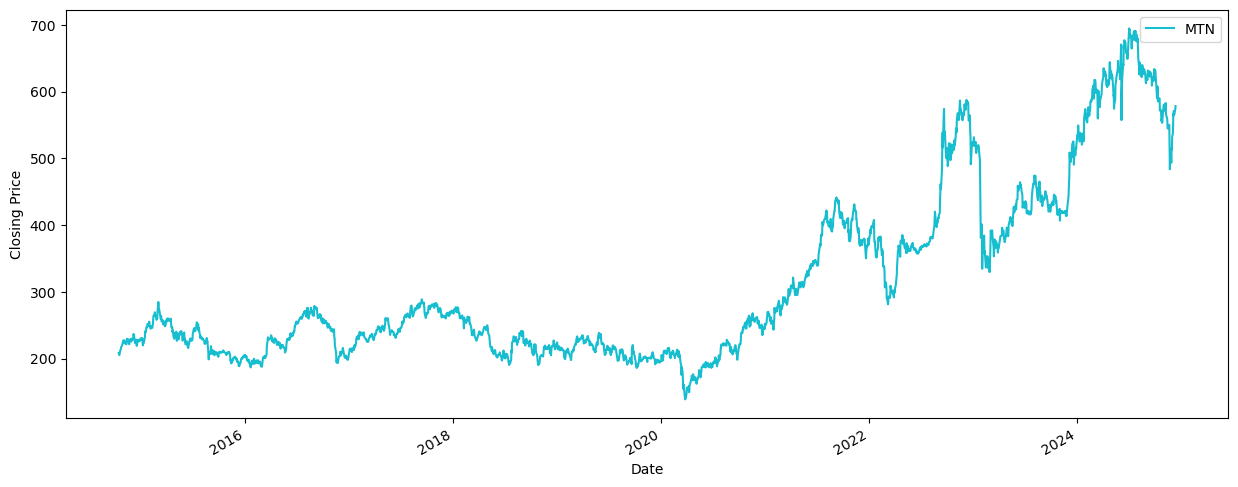

In [66]:
fig, ax = plt.subplots(figsize=(15, 6))
# Plot `df_vodacom` closing price
df_ambuja["close"].plot(ax=ax, label= 'MTN', color="C9")

# Label axes
plt.xlabel("Date")
plt.ylabel("Closing Price")


# Add legend
plt.legend()

Create a plot that shows the closing prices of df_suzlon and df_ambuja. Again, label your axes and include a legend.

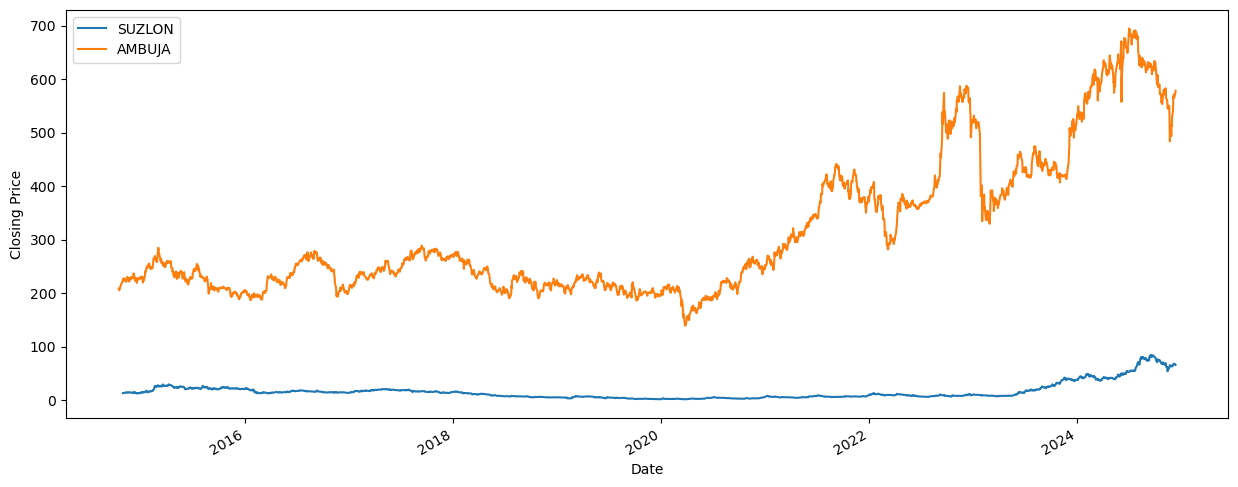

In [67]:
fig, ax = plt.subplots(figsize=(15, 6))
# Plot `df_ambuja` closing price
df_suzlon["close"].plot(ax=ax, label="SUZLON")
df_ambuja["close"].plot(ax=ax, label="AMBUJA")
# Label axes
plt.xlabel("Date")
plt.ylabel("Closing Price")


# Add legend
plt.legend()

Looking at this plot, we might conclude that Ambuja Cement is a "better" stock than Suzlon energy because its price is higher. But price is just one factor that an investor must consider when creating an investment strategy. What is definitely true is that it's hard to do a head-to-head comparison of these two stocks because there's such a large price difference.

In [68]:
# Sort DataFrame ascending by date
df_ambuja.sort_index(ascending=True, inplace=True)

# Create "return" column

df_ambuja["return"] = df_ambuja["close"].pct_change() * 100
print("df_ambuja shape:", df_ambuja.shape)
print(df_ambuja.info())
df_ambuja.head()

df_ambuja shape: (2500, 6)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2500 entries, 2014-10-14 to 2024-12-11
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2500 non-null   float64
 1   high    2500 non-null   float64
 2   low     2500 non-null   float64
 3   close   2500 non-null   float64
 4   volume  2500 non-null   float64
 5   return  2499 non-null   float64
dtypes: float64(6)
memory usage: 136.7 KB
None


,open,high,low,close,volume,return
date,,,,,,
2014-10-14,210.40,212.50,207.95,208.55,63772.0,NaN
2014-10-16,207.75,209.45,203.90,205.35,70145.0,-1.534404
2014-10-17,206.50,208.95,204.40,207.65,88132.0,1.120039
2014-10-20,209.00,213.80,209.00,212.95,54958.0,2.552372
2014-10-21,214.70,214.90,212.20,213.45,294327.0,0.234797


In [69]:
# Sort DataFrame ascending by date
df_ambuja.sort_index(ascending=True, inplace=True)

# Create "return" column

df_ambuja["return"] = df_ambuja["close"].pct_change() * 100
print("df_mtn shape:", df_ambuja.shape)
print(df_ambuja.info())
df_ambuja.head()

df_mtn shape: (2500, 6)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2500 entries, 2014-10-14 to 2024-12-11
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2500 non-null   float64
 1   high    2500 non-null   float64
 2   low     2500 non-null   float64
 3   close   2500 non-null   float64
 4   volume  2500 non-null   float64
 5   return  2499 non-null   float64
dtypes: float64(6)
memory usage: 136.7 KB
None


,open,high,low,close,volume,return
date,,,,,,
2014-10-14,210.40,212.50,207.95,208.55,63772.0,NaN
2014-10-16,207.75,209.45,203.90,205.35,70145.0,-1.534404
2014-10-17,206.50,208.95,204.40,207.65,88132.0,1.120039
2014-10-20,209.00,213.80,209.00,212.95,54958.0,2.552372
2014-10-21,214.70,214.90,212.20,213.45,294327.0,0.234797


Add a "return" column to df_naspers.

In [70]:
# Sort DataFrame ascending by date
df_suzlon.sort_index(ascending=True, inplace=True)

# Create "return" column

df_suzlon["return"] = df_suzlon["close"].pct_change() * 100
print("df_suzlon shape:", df_suzlon.shape)
print(df_suzlon.info())
df_suzlon.head()

df_suzlon shape: (2500, 6)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2500 entries, 2014-10-29 to 2024-12-11
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2500 non-null   float64
 1   high    2500 non-null   float64
 2   low     2500 non-null   float64
 3   close   2500 non-null   float64
 4   volume  2500 non-null   float64
 5   return  2499 non-null   float64
dtypes: float64(6)
memory usage: 136.7 KB
None


,open,high,low,close,volume,return
date,,,,,,
2014-10-29,12.99,13.33,12.90,13.29,7086999.0,NaN
2014-10-30,13.60,13.60,12.90,13.19,3114575.0,-0.752445
2014-10-31,13.25,13.80,13.20,13.45,5070450.0,1.971190
2014-11-03,13.90,13.99,13.35,13.40,4676967.0,-0.371747
2014-11-05,13.50,14.07,13.50,14.01,6800417.0,4.552239


 Plot the returns for df_mtn and df_naspers.

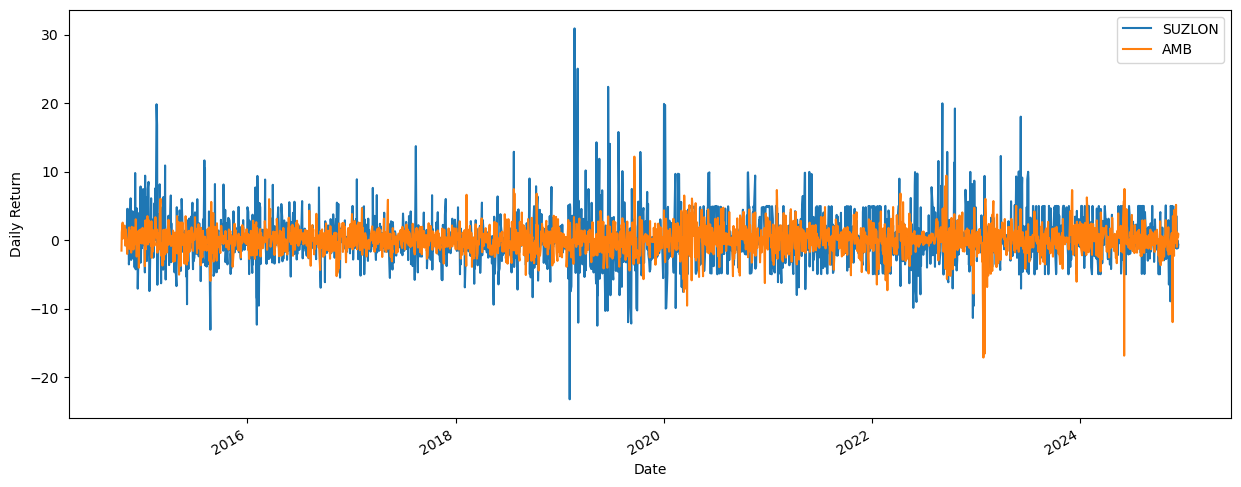

In [71]:
fig, ax = plt.subplots(figsize=(15, 6))
# Plot `df_ambuja` closing price
df_suzlon["return"].plot(ax=ax, label="SUZLON")
df_ambuja["return"].plot(ax=ax, label="AMB")
# Label axes
plt.xlabel("Date")
plt.ylabel("Daily Return")


# Add legend
plt.legend()

We can see that the returns for naspers have a wider spread. We see big gains and big losses. In contrast, the spread for mtn is narrower, meaning that the price doesn't fluctuate as much.

 By representing returns as a percentage, we're able to compare two stocks that have very different prices. But what is this visualization telling us? We can see that the returns for Suzlon have a wider spread. We see big gains and big losses. In contrast, the spread for Ambuja is narrower, meaning that the price doesn't fluctuate as much. 